# HW3 -Part 1 of 2 (28 pts)

# Introduction <a id="intro">

__HW3 has two parts. This is part 1 of 2.__ 
    
The total points from Part 1 and Part 2 are 28 and 4, respectively. Hence the total points is 32. 
    
For all implementation tasks, please clearly comment your code.    
    
References to examples, figures and pages are to the Reinforcement Learning book by Sutton and Barto. Tinkering notebooks are referred as TN.
    
__Deliverables for Part I:__ 

1- This notebook with modified code 

2- This notebook converted to pdf file including the necessary plots

3- Answers to pen-paper exercises in pdf format (can be included in Item 1-2)

# Imports <a id="imports">

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import gym_RLcourse
import TileCoding as tc
import pickle # used to read pickle data

See tinkering notebook on function approximation (TN6) for instructions related to the tile coding. 

If necessary for your implementations, add more packages to this section. 

# 1. Pen-and-paper exercises [11 points]

__A1:__ (1pt) Consider the approximate value function $\hat{v}(s,w) = w^T x(s)$, where $w \in \mathbb{R}^n$ is the vector of  the weights and $x(s) \in \mathbb{R}^n$ is the feature vector corresponding to state $s$. Show that the gradient of $\hat{v}(s,w)$ with respect to $w$ is given by $x(s)$, i.e. $\nabla \hat{v}(s,w) = x(s)$.<br>

$\hat{v}(s,w)=w_{1}x_{1}(s)+w_{2}x_{2}(s)+,...,+w_{n}x_{n}(s)$

$\nabla \hat{v}(s,w) = (\frac{\partial \hat{v}(s,w)}{\partial w_{1}},\frac{\partial \hat{v}(s,w)}{\partial w_{2}},...,\frac{\partial \hat{v}(s,w)}{\partial w_{n}})$.

$\nabla \hat{v}(s,w) = (x_{1}(s),x_{2}(s),...,x_{n}(s))=x(s)$



__A2:__ (2pts) Consider polynomial features given by Eqn. 9.17.  We consider a state vector $s$ consisting of tickness(t), density(d) and  conductivity (c) of an particular object, i.e. $s= [t, d, c]$ with  $t, d, c \in \mathbb{R}$. Here, $t,d,c$ are all normalized to $1$. 

* (1pt) Write the feature vectors for n=2.<br>
k=3

$x(s)=(
t^{0}d^{0}c^{0} ,t^{0}d^{0}c^{1} , t^{0}d^{0}c^{2} , t^{0}d^{1}c^{0} , t^{0}d^{1}c^{1} ,t^{0}d^{1}c^{2} ,t^{0}d^{2}c^{0} , t^{0}d^{2}c^{1} , t^{0}d^{2}c^{2} , t^{1}d^{0}c^{0} ,t^{1}d^{0}c^{1} ,t^{1}d^{0}c^{2} , t^{1}d^{1}c^{0} , t^{1}d^{1}c^{1} , t^{1}d^{1}c^{2} ,t^{1}d^{2}c^{0} ,t^{1}d^{2}c^{1} , t^{1}d^{2}c^{2} , t^{2}d^{0}c^{0} , t^{2}d^{0}c^{1} ,t^{2}d^{0}c^{2} ,t^{2}d^{1}c^{0} , t^{2}d^{1}c^{1} , t^{2}d^{1}c^{2} , t^{2}d^{2}c^{0} ,t^{2}d^{2}c^{1} ,t^{2}d^{2}c^{2})$




* (1pt) Suppose that $s= [1/2, 1/3, 1/5]^T$ and the weight vector $w$ is a vector of all ones. Find the value of the approximate value function $\hat{v}(s,w) = w^T x(s)$. <br>

$\hat{v}(s,w) = w^T x(s) = w_{1}t^{0}d^{0}c^{0} + w_{2}t^{0}d^{0}c^{1} + w_{3}t^{0}d^{0}c^{2} + w_{4}t^{0}d^{1}c^{0} + w_{5}t^{0}d^{1}c^{1} + w_{6}t^{0}d^{1}c^{2} + w_{7}t^{0}d^{2}c^{0} + w_{8}t^{0}d^{2}c^{1} + w_{9}t^{0}d^{2}c^{2} + w_{10}t^{1}d^{0}c^{0} + w_{11}t^{1}d^{0}c^{1} + w_{12}t^{1}d^{0}c^{2} + w_{13}t^{1}d^{1}c^{0} + w_{14}t^{1}d^{1}c^{1} + w_{15}t^{1}d^{1}c^{2} + w_{16}t^{1}d^{2}c^{0} + w_{17}t^{1}d^{2}c^{1} + w_{18}t^{1}d^{2}c^{2} + w_{19}t^{2}d^{0}c^{0}  w_{20}t^{2}d^{0}c^{1} + w_{21}t^{2}d^{0}c^{2} + w_{22}t^{2}d^{1}c^{0} + w_{23}t^{2}d^{1}c^{1} + w_{24}t^{2}d^{1}c^{2} + w_{25}t^{2}d^{2}c^{0} + w_{26}t^{2}d^{2}c^{1} + w_{27}t^{2}d^{2}c^{2}$

$\hat{v}(s,w) = \frac{1}{2}^{0}\frac{1}{3}^{0}\frac{1}{5}^{0} + \frac{1}{2}^{0}\frac{1}{3}^{0}\frac{1}{5}^{1} + \frac{1}{2}^{0}\frac{1}{3}^{0}\frac{1}{5}^{2} + \frac{1}{2}^{0}\frac{1}{3}^{1}\frac{1}{5}^{0} + \frac{1}{2}^{0}\frac{1}{3}^{1}\frac{1}{5}^{1} + \frac{1}{2}^{0}\frac{1}{3}^{1}\frac{1}{5}^{2} + \frac{1}{2}^{0}\frac{1}{3}^{2}\frac{1}{5}^{0} + \frac{1}{2}^{0}\frac{1}{3}^{2}\frac{1}{5}^{1} + \frac{1}{2}^{0}\frac{1}{3}^{2}\frac{1}{5}^{2} + \frac{1}{2}^{1}\frac{1}{3}^{0}\frac{1}{5}^{0} + \frac{1}{2}^{1}\frac{1}{3}^{0}\frac{1}{5}^{1} + \frac{1}{2}^{1}\frac{1}{3}^{0}\frac{1}{5}^{2} + \frac{1}{2}^{1}\frac{1}{3}^{1}\frac{1}{5}^{0} + \frac{1}{2}^{1}\frac{1}{3}^{1}\frac{1}{5}^{1} + \frac{1}{2}^{1}\frac{1}{3}^{1}\frac{1}{5}^{2} + \frac{1}{2}^{1}\frac{1}{3}^{2}\frac{1}{5}^{0} + \frac{1}{2}^{1}\frac{1}{3}^{2}\frac{1}{5}^{1} + \frac{1}{2}^{1}\frac{1}{3}^{2}\frac{1}{5}^{2} + \frac{1}{2}^{2}\frac{1}{3}^{0}\frac{1}{5}^{0} + \frac{1}{2}^{2}\frac{1}{3}^{0}\frac{1}{5}^{1} + \frac{1}{2}^{2}\frac{1}{3}^{0}\frac{1}{5}^{2} + \frac{1}{2}^{2}\frac{1}{3}^{1}\frac{1}{5}^{0} + \frac{1}{2}^{2}\frac{1}{3}^{1}\frac{1}{5}^{1} + \frac{1}{2}^{2}\frac{1}{3}^{1}\frac{1}{5}^{2} + \frac{1}{2}^{2}\frac{1}{3}^{2}\frac{1}{5}^{0} + \frac{1}{2}^{2}\frac{1}{3}^{2}\frac{1}{5}^{1} + \frac{1}{2}^{2}\frac{1}{3}^{2}\frac{1}{5}^{2} = 3.134$

 
__A3:__ (2 pts) Exercise 13.4. (pg330)

$\nabla \ln \pi(a|s,\theta_{u}) = \frac{\nabla \pi(a|s,\theta_{u})}{\pi(a|s,\theta)} $

$= \frac{\sigma(s,\theta)\sqrt{2 \pi}}{e^{\frac{(a-u(s,\theta)^{2})}{-2\sigma(s,\theta)^{2}}}} \frac{1}{\sigma(s,\theta)\sqrt{2 \pi}} \nabla e^{\frac{(a-u(s,\theta)^{2})}{-2\sigma(s,\theta)^{2}}}$

$= \frac{\sigma(s,\theta)\sqrt{2 \pi}}{e^{\frac{(a-u(s,\theta)^{2})}{-2\sigma(s,\theta)^{2}}}} \frac{1}{\sigma(s,\theta)\sqrt{2 \pi}} e^{\frac{(a-u(s,\theta)^{2})}{-2\sigma(s,\theta)^{2}}} \frac{1}{-2\sigma(s,\theta)^{2}} 2(a-u(s,\theta)) \nabla (a-u(s,\theta))$

$ = \frac{(a-u(s,\theta))}{\sigma(s,\theta)^{2}} x_{u}(s)$


$\nabla \ln \pi(a|s,\theta_{\sigma}) = \frac{\nabla \pi(a|s,\theta_{\sigma})}{\pi(a|s,\theta)} $

$= \frac{\sigma(s,\theta)\sqrt{2 \pi}}{e^{\frac{(a-u(s,\theta)^{2})}{-2\sigma(s,\theta)^{2}}}} \nabla \frac{e^{\frac{(a-u(s,\theta)^{2})}{-2\sigma(s,\theta)^{2}}}}{\sigma(s,\theta)\sqrt{2 \pi}} $

$= \frac{\sigma(s,\theta)\sqrt{2 \pi}}{e^{\frac{(a-u(s,\theta))^{2}}{-2\sigma(s,\theta)^{2}}}}  \frac{(\nabla e^{\frac{(a-u(s,\theta))^{2}}{-2\sigma(s,\theta)^{2}}} \sigma(s,\theta)\sqrt{2 \pi}) - (e^{\frac{(a-u(s,\theta))^{2}}{-2\sigma(s,\theta)^{2}}} \nabla \sigma(s,\theta)\sqrt{2 \pi})}{(\sigma(s,\theta)\sqrt{2 \pi})^{2}} $

$= \frac{(\nabla \frac{(a-u(s,\theta))^{2}}{-2\sigma(s,\theta)^{2}}\sigma(s,\theta)\sqrt{2\pi})-(\sigma (s,\theta) x_{\sigma}(s) \sqrt{2\pi})}{\sigma(s,\theta)\sqrt{2\pi}}$

$= \frac{(a-u(s,\theta))^{2}}{-2} \frac{-2\sigma(s,\theta) \nabla \sigma(s,\theta)}{\sigma(s,\theta)^{4}} -x_{\sigma}(s)$

$= \frac{(a-u(s,\theta))^{2} x_{\sigma}(s)}{\sigma(s,\theta)^{2}} - x_{\sigma}(s)$

$= (\frac{(a-u(s,\theta))^{2}}{\sigma(s,\theta)^{2}}-1)x_{\sigma}(s)$

__A4:__ (6 pts) Consider the shortest possible example of random walk, i.e. a room with two exits. Hence, we have one starting state (S) and two terminal states (terminal left (TL) and terminal right (TR)). The environment can be represented as: TL S TR.  We start at state S and have only two actions available: 'left' and 'right'. When we choose an action, and exit the room, we get the reward and the episode ends. Exiting to right gives the reward $R_R>0$ and exiting to the left gives the reward $R_L>0$. We define the features similar to Example 13.1: $x(S,right)=[1,0]^T$  and $x(S,left)=[0,1]^T$.  We parametrize the policy using Eqn. 13.2 and Eqn. 13.3. We consider REINFORCE on page 328 with $\alpha=1$ and $\gamma=1$. 

* (1pt) Calculate $\nabla \ln \pi(right|s, \mathbf{\theta})$ in terms of $\pi(left)$ and $\pi(right)$<br>

$\nabla \ln \pi(right|s, \mathbf{\theta}) =  \frac{\nabla \pi(right|s, \mathbf{\theta})}{\pi(right|s, \mathbf{\theta})}$

$\nabla \pi(right|s, \mathbf{\theta}) = \frac{\nabla e^{h(s,right,\theta)}(e^{h(s,left,\theta)} + e^{h(s,right,\theta)}) - \nabla (e^{h(s,left,\theta)} + e^{h(s,right,\theta)}) e^{h(s,right,\theta)}}{(e^{h(s,left,\theta)} + e^{h(s,right,\theta)})^{2}} = \frac{e^{h(s,right,\theta)} x(s,right) (e^{h(s,left,\theta)} + e^{h(s,right,\theta)}) - (e^{h(s,left,\theta)} x(s,left) + e^{h(s,right,\theta)} x(s,right)) e^{h(s,right,\theta)}}{(e^{h(s,left,\theta)} + e^{h(s,right,\theta)})^{2}}$ 

$\pi(right|s, \mathbf{\theta}) = \frac{e^{h(s,right,\theta)}}{e^{h(s,left,\theta)} + e^{h(s,right,\theta)}}$

$\pi(left|s, \mathbf{\theta}) = \frac{e^{h(s,left,\theta)}}{e^{h(s,left,\theta)} + e^{h(s,right,\theta)}}$

$\nabla \ln \pi(right|s, \mathbf{\theta}) = x(s,right) - (\pi(left|s,\theta)x(s,left) + \pi(right|s,\theta)x(s,right))$

$\nabla \ln \pi(right|s, \mathbf{\theta}) = x(s,right) - \sum_{b}\pi(b|s,\theta)x(s,b) $

* (1pt) Calculate $\nabla \ln \pi(left|s, \mathbf{\theta})$ in terms of $\pi(left)$ and $\pi(right)$ 

$\nabla \ln \pi(left|s, \mathbf{\theta}) = x(s,left) - (\pi(left|s,\theta)x(s,left) + \pi(right|s,\theta)x(s,right))$

$\nabla \ln \pi(left|s, \mathbf{\theta}) = x(s,left) - \sum_{b}\pi(b|s,\theta)x(s,b) $


* (1pt) Initialize $\mathbf{\theta} =0$. Find the initial policy $\pi$.  Suppose that our action in the first episode is 'right'. Update $\theta$ and find the resulting policy. 

$h(s,a,\theta)=\theta^{T}x(s,a)=0$

$Initial ~ \pi(a|s,\theta)=\frac{e^{h(s,a,\theta)}}{\sum_{b}e^{h(s,b,\theta)}} = \pi(left|s,\theta) = \pi(left|s,\theta) = \frac{1}{2}$

$Update:~ \theta \leftarrow \theta + \alpha \gamma^{t} G \nabla \ln \pi(right|s, \mathbf{\theta})$, in which $\alpha = 1, \gamma = 1,  G=\sum^{T}_{k=t+1} \gamma^{k-t-1}R_{R} = R_{R}$.

$\theta \leftarrow \theta +  \nabla \ln \pi(right|s, \mathbf{\theta}) \cdot R_{R} $ 

$\theta = (0,0) + \frac{1}{2} (x(s,right)-x(s,left))R_{R}$


$\theta =  \frac{1}{2} ([1,0]-[0,1])R_{R}$


$\theta = (\frac{1}{2}R_{R},- \frac{1}{2}R_{R})$

* (1pt) Consider the second episode. State which action is more probable now. Calculate the update for $\theta$  assuming the most probable action is taken. 

$h(s,left,\theta)=\theta^{T}x(s,left)=(\frac{1}{2}R_{R},- \frac{1}{2}R_{R})^{T} [0,1]=-\frac{1}{2} R_{R}$

$h(s,right,\theta)=\theta^{T}x(s,right)=(\frac{1}{2}R_{R},- \frac{1}{2}R_{R})^{T} [1,0]=\frac{1}{2} R_{R}$

$\pi(right|s, \mathbf{\theta}) = \frac{e^{h(s,right,\theta)}}{e^{h(s,left,\theta)} + e^{h(s,right,\theta)}} = \frac{e^{\frac{1}{2} R_{R}}}{e^{h(s,left,\theta)} + e^{h(s,right,\theta)}}$

$\pi(left|s, \mathbf{\theta}) = \frac{e^{h(s,left,\theta)}}{e^{h(s,left,\theta)} + e^{h(s,right,\theta)}} = \frac{e^{-\frac{1}{2} R_{R}}}{e^{h(s,left,\theta)} + e^{h(s,right,\theta)}}$

$\pi(right|s, \mathbf{\theta}) > \pi(left|s, \mathbf{\theta})$. Take go right action.

$\theta \leftarrow \theta +  \nabla \ln \pi(right|s, \mathbf{\theta}) \cdot R_{R} $ 

$\theta = (\frac{1}{2}R_{R},- \frac{1}{2}R_{R}) + (x(s,right) - (\pi(left|s,\theta)x(s,left) + \pi(right|s,\theta)x(s,right))) R_{R}$

$\theta = R_{R}[\frac{3}{2} - \pi(right|s,\theta), -\frac{1}{2}- \pi(left|s,\theta)]$


* (1pt) State whether you think REINFORCE will succesfully find the correct policy. Justify your answer.

No it cannot. Suppose $R_{R}<R_{L}$, in previous cese, it already failed to find the optimal policy because it keeps choose go right continously while go left can get better rewards.

* (1pt) Let $R_M=(R_R+R_L)/2$. Assume that you know the value of $R_M$. Suggest a method to improve the performance of REINFORCE or state why this information is not helpful. Justify your answer. 

It can be used as a baseline of REINFORCE but won't help too much, because it is a constant value. A better baseline should vary with the state.

In [12]:
#compute A2
v=0
t,d,c=1/2,1/3,1/5
for i in range(3):
    for j in range(3):
        for k in range(3):
            v += (t**i) * (d**j) * (c**k)
print(v)

3.134444444444444


# 2. Implementation - Prediction with function approximation [4 pts]

We will consider prediction with function approximation using n-step TD. You can use any feature set of your choice. 

We will test our implementation using the corridor environment with $100$ non-terminal states from TN6: 

`env = gym.make('Corridor-v0', n_starting_states=100, max_delta=10)`.

Hint: n-step SARSA for state-action value approximation is already implemented in TN6. TD is similar. 

__Task-TD1:__ Implement n-step TD on page 209. 

__Task-TD2:__ Choose good parameters for the algorithm. Provide a plot comparing the true value function with your approximation. Note that the true value function is given in the supplementary file for TN6.

Search for 'TD_n grid search' to see the results

__Task-TD3:__ Discuss your results. Do you get equally good approximations for all states? How good are your predictions compared to those of Monte-Carlo methods in Chapter 9? 

The result of TD(n) is better than Monte-Carlo methods. In TN_L6 we calculated the mean spare error (mse) between the true v function and the Monte-Carlo methods approximated v function are around 0.02. Here, when n=1, the mse between TD(n) and true value function is around 0.002 which is 10 times less than Monte-Carlo methods.

This probably is because that Monte-Carlo methods brings more variances and this task is sensitive to the variances.

__Grading:__ 

* Task-TD1: 1 point for a code that runs (irrespective of the correctness of the implementation)
* Task-TD2: 1 point for the plot.
* Task-TD3: Up to 2pts for discussions. 

In [423]:
 class LinearApproximator:

    def __init__(self, order, method="Fourier", alpha=1e-4, stateRange=1):
        self.alpha = alpha
        self.method = method
        self.order = order
        self.weights = np.zeros(order + 1)
        self.stateRange = stateRange
        self.construct_basis()

    def construct_basis(self):
        if self.method == "Polynomial":
            self.basis = [lambda s, i=i: np.power(s, i) for i in range(0, self.order + 1)]
        if self.method == "Fourier":
            self.basis = [lambda s, i=i: np.cos(np.pi * s * i) for i in range(0, self.order + 1)]

    def value(self, state):
        return np.dot(self.features(state), self.weights)

    def features(self, state):
        state = state / self.stateRange  # normalize to [0, 1]
        return np.array([f(state) for f in self.basis])

    def update(self, target, state):
        delta = self.alpha * (target - self.value(state))
        self.weights += delta * self.features(state)

In [424]:
class SARSA_n_step:
    def __init__(self, n, gamma, alpha, stateRange,
                 order, method,n_states,n_actions):
        self.V = np.zeros(n_states)
        self.n_states=n_states
        self.n_actions = n_actions
        self.n = n  # parameter n for n-step SARSA
        self.gamma = gamma
        self.alpha = alpha
        self.done = False
        self.func_approx = LinearApproximator(order, method, alpha, stateRange)
        
    def act(self, state):
        return np.random.choice(self.n_actions)

    def learn(self, states, actions, rewards, t, T):
        tau = t - self.n + 1  # modified to +1 by the book page 247
        if tau >= 0:
            G = 0
            for i in range(tau + 1, min(tau + self.n, T) + 1):
                G += np.power(self.gamma, i - tau - 1) * rewards[i]
                #rewards_record.append(rewards[i])
            if tau + self.n < T:
                G += np.power(self.gamma, self.n) * self.func_approx.value(states[tau + self.n])
            self.func_approx.update(target=G, state=states[tau])
        return tau




In [425]:
def train_agent(env,agent,nEpisode=500):
    nEpisode = nEpisode
    step_list=[]
    for iEpisode in range(1,nEpisode+1):
        done = False
        t = 0
        T = np.inf
        state = env.reset()
        action = agent.act(state)
        actionA = [action]
        stateA = [state]
        rewardA = [0]
        while not done:
            if t < T:
                state, reward, done, info = env.step(action)
                stateA.append(state)
                rewardA.append(reward)
                action = agent.act(state)
                actionA.append(action)
                if done:
                    T = t + 1
            tau = agent.learn(stateA, actionA, rewardA, t, T)
            t += 1
            if tau == T - 1:
                done = True
        step_list.append(t)

start
alpha=0.01, mse with v_true 0.0016887641121688555
alpha=0.0022, mse with v_true 0.0005268973416197296
alpha=0.0028, mse with v_true 0.001674324147446564
alpha=0.003, mse with v_true 0.0013485362006812089


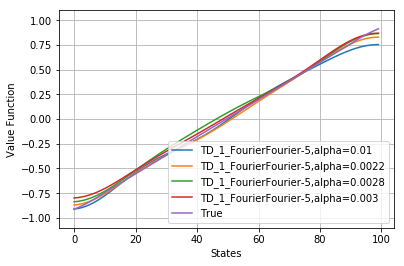

In [529]:
#TD_n grid search
run_n_times=1
env = gym.make('Corridor-v0', n_starting_states=100, max_delta=10)
stateRange = env.observation_space.n - 2
with open('RandomWalk_100.pickle', 'rb') as file: # load the pre-calculated true values
    v_true = pickle.load(file)
print("start")
method="Fourier"
order=5
n=1
alpha_list=[1.0e-2,2.2e-3,2.8e-3,3.0e-3]
for alpha in alpha_list:
    V_list=[]
    for i in range(run_n_times): #Fourier or Polynomial #2.0e-3,
        agent =  SARSA_n_step(n=n,gamma=1,alpha=alpha,
                       stateRange=stateRange,order=order, method=method,
                       n_states=env.observation_space.n,n_actions=env.action_space.n)
        train_agent(env,agent,nEpisode=5000)
        for state in range(agent.n_states):# calculate V function
            agent.V[state] = agent.func_approx.value(state)
        V_list.append(agent.V[1:-1])

    V_list=np.mean(V_list,axis=0)
    plt.plot(V_list,label="TD_"+str(n)+"_"+method+"Fourier-"+str(order)+",alpha="+str(alpha))
    print("alpha="+str(alpha)+", mse with v_true",np.square(V_list - v_true[1:-1]).mean())
plt.plot(v_true[1:-1],label='True')
plt.grid(True)
plt.xlabel('States')
plt.ylabel('Value Function')
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()

# 2. Implementation - Control with function approximation [9 pts]

We will implement online Sarsa($\lambda$) with function approximation. We will use tile coding as features. Recall that the tinkering notebook on function approximation illustrates usage of tile coding.

We will test our implementation using 'MountainCar-v0' as the environment. Recall that you need use the following call to make MountainCar run longer than $200$ steps. 

`env = gym.make('MountainCar-v0').env`

__Task-SARSA1:__ Implement online Sarsa($\lambda$ given on page 307 with tile coding as features. 

__Task-SARSA2:__ __Clearly indicate the trace update using the tag `trace-update-here' as a comment__. Try to name all related variables in a self-explanatory manner so that it is easy to understand your code. 

__Task-SARSA3:__ Consider three different $\alpha$ and three $\lambda$ values of your choice. Create a table showing the average reward per episode in the beginning of the training for the first 20 episodes (averaged over at least 20 runs). Hence, the table will have $9$ values. We want to see the early performance, similar to Figure 12.10 and 12.11. 

Search for 'Task-SARSA3'.Run it would take long time, please see the result figure directly.

__Task-SARSA4:__ Discuss your results and relate the performance to that of other Sarsa methods shown on Figure 12.10. 

We implemented true-SARSA($\lambda$), SARSA($\lambda$) with accumulating, and SARSA($\lambda$) with replacing. By trying different SARSA with different parameters, they all have a "U" shape performance. This means some middle parameters give better performance. 

__Task-SARSA5:__ You will train the agent for $100$ episodes for $1$ run. Choose good values for the algorithm parameters. Count the number of times that the agent finishes before 200 time steps, i.e. a reward larger than -200 is obtained, ie. `count= np.count_nonzero(rewards > -200)` where reward is the array of rewards obtained during the episode. 

Search for 'Task-SARSA5' and run it

__Grading:__ 

* Task-SARSA1: 1 point for a code that runs (irrespective of the correctness of the implementation)
* Task-SARSA2: 1 point for correct implementation of the trace update. Only the lines with the tag `trace-update-here` will be checked.  
* Task-SARSA3: 1 pt for a table with plausible values. 
* Task-SARSA4: Up to 2 points for discussions. 
* Task-SARSA5: Up to 4 points. The performance is evaluated as follows: 

+1 pt if `count` is larger than 40. 

+1 pt if `count` is larger than 50.

+1 pt if `count` is larger than 60. 

+1 pt if `count` is larger than 70. 



In [501]:
class LinearApproximatorTile:
    def __init__(self, nTiling=8, size=4096, alpha=0.3, stateRange=1,true_sarsa =False):
        self.size = size
        self.nTiling = nTiling
        self.iht = tc.IHT(size)
        self.weights = np.zeros(size)
        self.alpha = alpha
        self.stateRange = stateRange
        self.true_sarsa=true_sarsa
        

        # scaling for the states, see``Fleshing out the example" section on http://incompleteideas.net/tiles/tiles3.html
        # For the mountain-car example also see footnote 1 on page 246 of SuttonBarto_2018
        scaleFactor = self.nTiling
        self.scale = [scaleFactor / s for s in self.stateRange]

    # get indices of active tiles (i.e features)
    def indicesActiveTiles(self, state, action):
        scaledState = [s * scale for s, scale in zip(state, self.scale)]
        return tc.tiles(self.iht, self.nTiling, scaledState, [action])

    # calculate q_app(state, action)
    def value(self, state, action):
        ind = self.indicesActiveTiles(state, action)
        return np.sum(self.weights[ind])

    # update  q_app(state,action) with delta
    
    def update(self, state,action,target,Z):
        delta = target - self.value(state, action)
        self.weights += self.alpha*delta*Z
    def update_true_sarsa(self, delta,Q,Q_old,x, Z):
        #trace-update-here for true sarsa lambda
        self.weights += self.alpha*(delta+Q-Q_old)*Z
        self.weights[x] -=self.alpha*(Q-Q_old)*x
        #self.weights[x] += self.alpha*(delta+Q-Q_old)*Z[x] - self.alpha*(Q-Q_old)*x

In [505]:
# Create SARSA_lambda
class SARSA_lambda_Agent():
    
    def __init__(self, gamma, alpha, lam, epsilon,stateRange,true_sarsa=False):
        self.actions = range(3)  # 0,1,2:  reverse, stay, go forward
        self.state = [0, 0]  # position, velocity
        self.gamma = gamma
        self.alpha = alpha
        self.lam = lam # lambda 
        self.epsilon=epsilon
        self.true_sarsa=true_sarsa
        self.func_approx = LinearApproximatorTile(nTiling=8, size=4096,
                                                  alpha=alpha,
                                                  true_sarsa=true_sarsa,
                                                  stateRange=stateRange)
        self.Z = np.zeros(4096)
        self.Q_old=0
    def reset_trace(self): # Trace should be reset between episodes
        self.Z = np.zeros(4096)
        self.Q_old=0

    def act(self, state):
        if np.random.random_sample() <= self.epsilon:  # random action wp epsilon
            action = np.random.choice(self.actions)
        else:  # greedy action wp 1-epsilon
            action_values = []
            for action in self.actions:
                action_values.append(self.func_approx.value(state, action))
            max_value = np.max(action_values)
            indices_bestValue = [i for i, j in enumerate(action_values) if j == max_value]
            action = np.random.choice(indices_bestValue)
        return action
    
    def learn(self, state, action, reward, state_next):
        action_next = self.act(state_next)
        if self.true_sarsa==False: #Accumulating trace and Replacing trace
            x = self.func_approx.indicesActiveTiles(state,action)     
            Q_prime = self.func_approx.value(state_next,action_next)
            #trace-update-here for sarsa lambda with Accumulating or Replacing trace
            self.Z[x] += 1  # Accumulating trace
            #self.Z[x] = 1  # Replacing trace
            target= reward + self.gamma*Q_prime
            self.func_approx.update(state, action, target, self.Z)
            self.Z = self.gamma*self.lam*self.Z
        else:#true sarsa updates
            #trace-update-here for true sarsa lambda
            x_prime = np.array(self.func_approx.indicesActiveTiles(state_next,action_next))
            Q = self.func_approx.value(state,action)
            Q_prime = self.func_approx.value(state_next,action_next)
            delta = reward + self.gamma*Q_prime - Q
            self.Z = self.gamma*self.lam*self.Z   
            temp=1-self.alpha*self.gamma*self.lam*np.dot(np.transpose(self.Z[self.x]),self.x)
            self.Z[self.x] += temp
            self.func_approx.update(delta,Q,self.Q_old,self.x, self.Z)
            self.Q_old=Q_prime
            self.x = x_prime

In [506]:
#Training utility for mountain_car
def train_agent_mountain_car(agent, env, n_episodes):
    total_reward_list=[]
    step_list=[]
    for i in range(n_episodes):
        state = env.reset()
        done = False
        rewards=0
        agent.reset_trace()
        t=0
        while not done:
            action = agent.act(state)
            state_next, reward, done, info = env.step(action)
            rewards=rewards+reward
            agent.learn(state, action, reward, state_next)
            state = state_next
            t=t+1
            if t==2000:
                done = True
                
        step_list.append(t)
        total_reward_list.append(rewards)
    return total_reward_list,step_list

def compute_count(step_list):
    count=0
    for i in step_list:
        if i<200:
            count +=1
    return  count


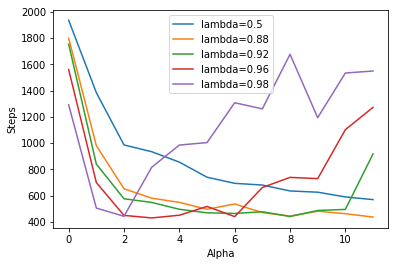

In [511]:
#Task-SARSA3, show performance in different lambda and alpha
env = gym.make('MountainCar-v0').env
min_position = -1.2
max_position = 0.6  # Gym 'MountainCar-v0' uses 0.6 instead of 0.5 of the book
max_velocity = 0.07
min_velocity = -0.07
stateRange = [max_position - min_position, max_velocity - min_velocity]
lam_list=[0.5,0.88,0.92,0.96,0.98]
alpha_list=[0.1e-2,0.5e-2,1.0e-2,1.2e-2,1.4e-2,
            1.8e-2,2.0e-2,2.2e-2,2.4e-2,2.6e-2,2.8e-2,3.0e-2]
average_time=3
episodes=20
true_sarsa=False
average_total_reward_list=[]
for lam in lam_list:
    plot_info=[]
    for alpha in alpha_list:
        step_list=[]
        for i in range(average_time):
            agent = SARSA_lambda_Agent(gamma=1, lam=lam,epsilon=0.1,
                                       true_sarsa=true_sarsa,
                                       alpha=alpha, stateRange=stateRange)
            total_reward_list,steps=train_agent_mountain_car(agent, env, n_episodes=episodes)
            step_list.append(np.mean(steps))
        plot_info.append(np.mean(step_list))
    plt.plot(plot_info,label="lambda="+str(lam))
    
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Steps')
plt.show()
        

count for average 5 times 73.0


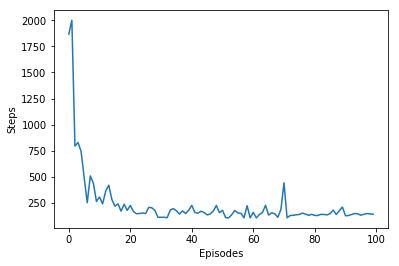

In [508]:
#Task-SARSA5, show count larger than 70
env = gym.make('MountainCar-v0').env
min_position = -1.2
max_position = 0.6  # Gym 'MountainCar-v0' uses 0.6 instead of 0.5 of the book
max_velocity = 0.07
min_velocity = -0.07
stateRange = [max_position - min_position, max_velocity - min_velocity]
true_sarsa=False
count_list=[]
average_step_list=[]
for i in range(1):
    agent = SARSA_lambda_Agent(gamma=1, lam=0.88,epsilon=0.1,
                               alpha=1.4e-2,
                               true_sarsa=true_sarsa,
                               stateRange=stateRange)
    total_reward_list,step_list=train_agent_mountain_car(agent, env, n_episodes=100)
    count_list.append(compute_count(step_list))
    average_step_list.append(step_list)
print("count for average 5 times",np.mean(count_list))
plt.plot(np.mean(average_step_list,axis=0))
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.show()

# 3. Implementation - Dyna-Q+ [4 pts]
 

__Task-DynaQ1:__ Complete the implementation for Dyna-Q+ from TN8. See instructions in TN8 to see where do you need to complete the code. Put the modified code below. __Clearly indicate where you changed the code using the tag `dynaqplus-here` as a comment.__

Dyna-Q+ is integrated in DynaQ. Search for `dynaqplus-here`.

__Task-DynaQ2:__ Consider the idea mentioned in Exercise 8.4. DynaQ+ changes the estimated values of state-action pairs instead of only modifying the action selection procedure with an extra reward. We will now investigate whether changing the q function is necessary. 

Implement another variant that can called by calling the function with the option `flag_dynaq_plus=2`. Let's call this agent DynaQAct.  DynaQAct should have the following properties:  1) planning is done as in Dyna-Q,  2) the action selection is changed so that we select one of the actions for which maximum value of $Q(s,a) + \kappa \sqrt{\tau(s,a)}$ is achieved. 

__Clearly indicate in your code where DynaQA is possibly different from DynaQ and DynaQ+ using the tag `dynaqact-here` as a comment.__

DynaQA is integrated in DynaQ. Search for `dynaqact-here`.

__Task-DynaQ3:__  Consider the blocking maze experiment of Example 8.2. Discuss the performance of DynaQ+ and DynaQAct by looking at the following: 

- Show example policies found by both agents at appropriately chosen episodes after the change. 

- Plot cumulative reward versus time steps for both agents, similar to Figure 8.4, averaged over at least 3 runs.  

Explain the results. Note that most of the code for performing these visualization tasks are already available in TN8.

We tried different kappa={0.001,0.01,0.1,1,100000} and the results show that with lower kappa (0.001) DynaQ+ has the best performance. it can recognize the changes of the environment fast because the bonus will accumulate at Q values which encourage the agent to hit the walls and find out the changes because these walls are never visited and have higher Q value because of the term $\kappa \sqrt{\tau}$. While in this setting, The DynaQ-qact's behavior  is disturbed (worse performance than Dyna-Q+) because the bonus only affects the actions rather than Q values.

The intuition is that DynaQ-quac will hit the walls only when it near the walls, while the DynaQ+ will always try to close and hitting the walls whatever where it is.

The intuition can be proved when we set the  kappa = 100000, In this case DynaQ+ has the worst performance because it always tries to hitting the ways instead of trying to reach the goal. While, DynaQ-quac can still keep certain sanity because it will prefer to hit the walls only when it near the walls.

When we turn on visualize_policy==True, we can see the policies in different stages (BL and BR) and different dynaQs. 

DynaQ+ has the policy on the walls, This means the Q values on the walls are not equal to 0. because the walls will never be visited so the Q value accumulated because of the term $\kappa \sqrt{\tau}$. For  Dyna-qact, the walls remain "-", this means bonus does not affect the Q values.

__Grading:__ 

* Task-DynaQ1: 1 point for correct code completation for DynaQ+. Only lines with the tag `dynaqplus-here` will be checked. 
* Task-DynaQ2: 1 point for correct implementation of the variant in Task-DynaQ2. Only lines with `dynaqact-here` will be checked. 
* Task-DynaQ3: Up to 2 points for discussion with clear connections to the plots and our theoretical expectations. (Plots are necessary but not sufficient, i.e. having plots do not give any points if there is no discussion)


In [313]:
class DynaQ:
    def __init__(self, n_states, n_actions, env_shape, n=0, gamma=0.95,
                 epsilon=0.1, alpha=0.1, flag_dynaq_plus=0, kappa=1e-3,dynamic_epsilon=0):
        self.n_actions = n_actions
        self.actions = range(n_actions)
        self.n_states = n_states
        self.n = n  # number of planning steps
        self.gamma = gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.flag_dynaq_plus = flag_dynaq_plus
        self.kappa = kappa
        self.env_shape = env_shape
        self.q_value = np.zeros((n_states, n_actions))
        self.visited_states = [] # list of visited states
        self.visit_status_pairs = np.zeros((n_states, n_actions)) # set to 1 if state,action pair is visited
        self.model = {}
        if self.flag_dynaq_plus == 1 or self.flag_dynaq_plus == 2: # see page 168
            self.time = 0  # internal counter for calls to learn()
            self.visit_last_time_pairs = np.zeros((n_states, n_actions)) # store last visit time
            for state in range(n_states):  # initialization of the model, see footnote on page 168
                [self.visited_states.append(state)  for state in range(n_states)] # initialize as all states visited
                for action in range(n_actions):
                    self.model[state, action] = state, 0  # state, reward =0

    # page 164, Tabular-Dyna-Q, step b
    def act(self, state):
        if np.random.random_sample() <= self.epsilon:  # random action wp epsilon
            action = np.random.choice(self.actions)
        else:  # greedy action wp 1-epsilon
            #dynaqact-here
            if self.flag_dynaq_plus == 2:
                action = self.greedy_qact(state)
            else:      
                action = self.greedy(state)
        return action

    def greedy(self, state):
        action_values = self.q_value[state, :]
        max_value = np.max(action_values)
        indices_max_value = [i for i, j in enumerate(action_values.tolist()) if j == max_value]
        action = np.random.choice(indices_max_value)
        return action
    #dynaqact-here
    def greedy_qact(self, state):
        time_passed = self.time - self.visit_last_time_pairs[state, :]
        action_values = self.q_value[state, :]+self.kappa*np.sqrt(time_passed)
        max_value = np.max(action_values)
        indices_max_value = [i for i, j in enumerate(action_values.tolist()) if j == max_value]
        action = np.random.choice(indices_max_value)
        return action

    def best_action_value(self, state):
        return np.max(self.q_value[state, :])

    # page 164, Tabular-Dyna-Q, step d
    def update_action_value(self, state, action, state_next, reward):
        delta = reward + self.gamma * self.best_action_value(state_next) - self.q_value[state, action]
        self.q_value[state, action] += self.alpha * delta

    # page 164, Tabular-Dyna-Q, step e
    def update_model(self, state, action, state_next, reward):
        self.visited_states.append(state)
        self.visited_states = list(set(self.visited_states))
        self.visit_status_pairs[state, action] = 1
        self.model[state, action] = state_next, reward
        if self.flag_dynaq_plus == 1:
            self.visit_last_time_pairs[state, action] = self.time

    # page 164, Tabular-Dyna-Q, call functions for step d-e-f
    def learn(self, state, action, state_next, reward, done):
        self.update_action_value(state, action, state_next, reward)
        self.update_model(state, action, state_next, reward)
        self.plan()
        #dynaqact-here
        if self.flag_dynaq_plus == 1 or self.flag_dynaq_plus == 2:
            self.time += 1
                
    # page 164, Tabular-Dyna-Q, step f
    def plan(self):
        for iPlan in range(self.n):
            state, action = self.sample_visit()
            [state_next, reward] = self.model[state, action]
            if self.flag_dynaq_plus == 1:
                time_passed = self.time - self.visit_last_time_pairs[state, action]
                # reward-modification-not-implemented
                # dynaqplus-here
                reward +=self.kappa*np.sqrt(time_passed)
            self.update_action_value(state, action, state_next, reward)

    def sample_visit(self):
        state = np.random.choice(self.visited_states)
        if self.flag_dynaq_plus == 0:
            #return action with visit_status_pairs[state,action]==1
            visited_actions_for_state = np.where(self.visit_status_pairs[state, :] > 0)[0]
            action = np.random.choice(visited_actions_for_state)
        else:
            action = np.random.choice(self.n_actions)
        return state, action

    #  for visualization of policy similar to Figure 8.3
    def plot_policy(self):
        directions = {0: ' U ', 1: ' R ', 2: ' D ', 3: ' L '}
        for state in range(self.n_states):
            q = self.q_value[state, :]
            if np.count_nonzero(q == q[0]) == len(q):
                action = " - "
            else:
                action = directions[self.greedy(state)]
            print(action, end='')
            position = np.unravel_index(state, self.env_shape)
            if position[1] == self.env_shape[1] - 1:
                print('')
        print('')

In [314]:
def train(env, agent, nEpisode, nTotalStep):
    length_episodes = np.inf*np.ones(nEpisode)
    rewardA = []
    iTotalStep = 0  # global step index over all episodes
    for iEpisode in range(nEpisode):
        done = False
        t = 0  # step index within episode
        T = np.inf
        state = env.reset()
        action = agent.act(state)
        while not done:
            if t < T:
                state_past = state
                state, reward, done, info = env.step(action)
                agent.learn(state_past, action, state, reward, done)
                rewardA.append(reward)
                action = agent.act(state)
                iTotalStep += 1
                if done:
                    #agent.plot_policy() # visualize-policy
                    T = t + 1
                    length_episodes[iEpisode] = T
            t += 1
            if iTotalStep > nTotalStep:
                iEpisode = nEpisode
                done = True
    rewardA = rewardA[0:nTotalStep]
    return length_episodes, rewardA
def plot_cumulative_rewards(rewards1, rewards2): # for plots similar to Figure 8.4
    rewards1_cumulative = np.cumsum(rewards1)
    rewards2_cumulative = np.cumsum(rewards2)
    rewards2_cumulative = np.array(rewards2_cumulative) + rewards1_cumulative[-1]
    rewards_cumulative = np.concatenate([rewards1_cumulative, rewards2_cumulative])
    plt.plot(rewards_cumulative)
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative Reward')
    plt.ylim(-5, 400)
    plt.grid(True)
    plt.show()
    
def cumulative_rewards(rewards1, rewards2):
    rewards1_cumulative = np.cumsum(rewards1)
    rewards2_cumulative = np.cumsum(rewards2)
    rewards2_cumulative = np.array(rewards2_cumulative) + rewards1_cumulative[-1]
    return np.concatenate([rewards1_cumulative, rewards2_cumulative])
    
def plot_cumulative_rewards_comparison(rewards1, rewards2,rewards3, rewards4, rewards5, rewards6):
    rewards_cumulative_1=cumulative_rewards(rewards1, rewards2)
    rewards_cumulative_2=cumulative_rewards(rewards3, rewards4)
    rewards_cumulative_3=cumulative_rewards(rewards5, rewards6)
    plt.plot(rewards_cumulative_1,label='Dyna-Q')
    plt.plot(rewards_cumulative_2,label="Dyna-Q-plus")
    plt.plot(rewards_cumulative_3,label="Dyna-Q-qact")
    plt.xlabel('Time Steps')
    plt.ylabel('Cumulative Reward')
    plt.ylim(-5, 400)
    plt.grid(True)
    plt.legend()
    plt.show()
    

In [331]:
def train_on_dynamic_env(flag_dynaq_plus=0,kappa=0.001,visualize_policy=False):
    env = gym.make('DynaMaze-v0', maze_type='BL')
    agent = DynaQ(env.observation_space.n, env.action_space.n, env.shape, n=5, gamma=0.95, epsilon=0.1, alpha=1,
                  flag_dynaq_plus=flag_dynaq_plus, kappa=kappa)
    steps_episodes1, rewards1 = train(env, agent, nEpisode=1000, nTotalStep=1000)
    if visualize_policy==True:
        print("BL policy,flag_dynaq_plus=",flag_dynaq_plus)
        agent.plot_policy()
    env = gym.make('DynaMaze-v0', maze_type='BR')
    steps_episodes2, rewards2 = train(env, agent, nEpisode=1000, nTotalStep=2000)
    if visualize_policy==True:
        print("BR policy,flag_dynaq_plus",flag_dynaq_plus)
        agent.plot_policy()
    #print('Both finished')
    return rewards1,rewards2

def average_results(flag_dynaq_plus,kappa=0.001,visualize_policy=False,average_time=3):
    reward1_list=[]
    reward2_list=[]
    for i in range(average_time):
        rewards1,rewards2=train_on_dynamic_env(flag_dynaq_plus=flag_dynaq_plus,kappa=kappa,visualize_policy=visualize_policy)
        reward1_list.append(rewards1)
        reward2_list.append(rewards2)
    return np.mean(reward1_list,axis=0),np.mean(reward2_list,axis=0)

train begin, train each dynaQ for 3 times


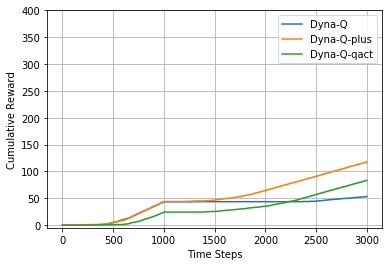

In [326]:
# plots for Task-DynaQ3:
average_time=3
kappa=0.001
visualize_policy=False
print("train begin, train each dynaQ for 3 times")
rewards1_dynaq,rewards2_dynaq=average_results(flag_dynaq_plus=0,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_plus,rewards2_dynaq_plus=average_results(flag_dynaq_plus=1,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_qact,rewards2_dynaq_qact=average_results(flag_dynaq_plus=2,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
plot_cumulative_rewards_comparison(rewards1_dynaq, rewards2_dynaq,rewards1_dynaq_plus, rewards2_dynaq_plus,rewards1_dynaq_qact,rewards2_dynaq_qact)

train begin, train each dynaQ for 3 times


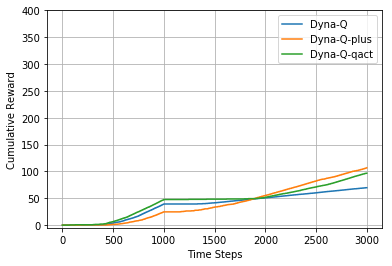

In [327]:
# plots for Task-DynaQ3:
average_time=3
kappa=0.01
visualize_policy=False
print("train begin, train each dynaQ for 3 times")
rewards1_dynaq,rewards2_dynaq=average_results(flag_dynaq_plus=0,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_plus,rewards2_dynaq_plus=average_results(flag_dynaq_plus=1,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_qact,rewards2_dynaq_qact=average_results(flag_dynaq_plus=2,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
plot_cumulative_rewards_comparison(rewards1_dynaq, rewards2_dynaq,rewards1_dynaq_plus, rewards2_dynaq_plus,rewards1_dynaq_qact,rewards2_dynaq_qact)

train begin, train each dynaQ for 3 times


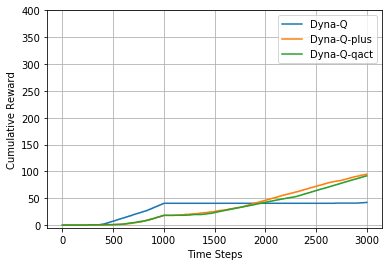

In [328]:
# plots for Task-DynaQ3:
average_time=3
kappa=0.1
visualize_policy=False
print("train begin, train each dynaQ for 3 times")
rewards1_dynaq,rewards2_dynaq=average_results(flag_dynaq_plus=0,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_plus,rewards2_dynaq_plus=average_results(flag_dynaq_plus=1,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_qact,rewards2_dynaq_qact=average_results(flag_dynaq_plus=2,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
plot_cumulative_rewards_comparison(rewards1_dynaq, rewards2_dynaq,rewards1_dynaq_plus, rewards2_dynaq_plus,rewards1_dynaq_qact,rewards2_dynaq_qact)

train begin, train each dynaQ for 3 times


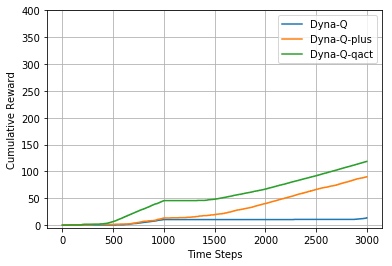

In [330]:
# plots for Task-DynaQ3:
average_time=3
kappa=1
visualize_policy=False
print("train begin, train each dynaQ for 3 times")
rewards1_dynaq,rewards2_dynaq=average_results(flag_dynaq_plus=0,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_plus,rewards2_dynaq_plus=average_results(flag_dynaq_plus=1,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_qact,rewards2_dynaq_qact=average_results(flag_dynaq_plus=2,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
plot_cumulative_rewards_comparison(rewards1_dynaq, rewards2_dynaq,rewards1_dynaq_plus, rewards2_dynaq_plus,rewards1_dynaq_qact,rewards2_dynaq_qact)

train begin, train each dynaQ for 3 times


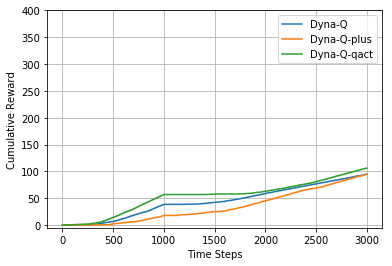

In [335]:
# plots for Task-DynaQ3:
average_time=3
kappa=100000
visualize_policy=False
print("train begin, train each dynaQ for 3 times")
rewards1_dynaq,rewards2_dynaq=average_results(flag_dynaq_plus=0,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_plus,rewards2_dynaq_plus=average_results(flag_dynaq_plus=1,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_qact,rewards2_dynaq_qact=average_results(flag_dynaq_plus=2,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
plot_cumulative_rewards_comparison(rewards1_dynaq, rewards2_dynaq,rewards1_dynaq_plus, rewards2_dynaq_plus,rewards1_dynaq_qact,rewards2_dynaq_qact)

train begin, train each dynaQ for 3 times
BL policy,flag_dynaq_plus= 0
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  - 

BR policy,flag_dynaq_plus 0
 R  R  R  R  R  R  D  -  - 
 R  R  U  R  U  -  R  R  U 
 R  R  U  -  U  -  -  R  U 
 -  -  -  -  -  -  -  -  U 
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  - 

BL policy,flag_dynaq_plus= 1
 R  L  U  D  L  U  D  L  L 
 D  U  L  R  L  L  R  L  U 
 D  L  L  L  L  L  U  L  U 
 U  R  U  D  U  U  L  D  U 
 L  R  U  R  R  R  D  D  U 
 U  U  U  R  U  R  D  U  D 

BR policy,flag_dynaq_plus 1
 D  R  R  R  R  R  R  R  R 
 R  R  U  R  R  U  U  R  U 
 R  U  U  U  U  U  U  R  U 
 U  R  L  U  R  U  L  U  R 
 U  L  L  L  L  D  D  L  U 
 U  U  U  L  L  L  L  L  L 

BL policy,flag_dynaq_plus= 2
 -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  R  U 
 -  -  -  -  -  -  -  U  U 
 -  -  -  -  -  -  -  -  U 
 R  R  R  R  R  R  R  R  U 

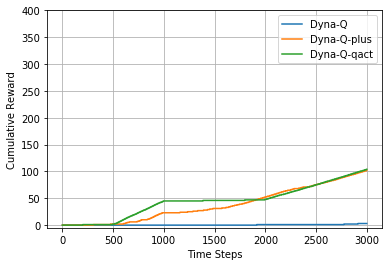

In [332]:
# plot policy for Task-DynaQ3:
average_time=1
kappa=0.1
visualize_policy=True
print("train begin, train each dynaQ for 3 times")
rewards1_dynaq,rewards2_dynaq=average_results(flag_dynaq_plus=0,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_plus,rewards2_dynaq_plus=average_results(flag_dynaq_plus=1,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
rewards1_dynaq_qact,rewards2_dynaq_qact=average_results(flag_dynaq_plus=2,kappa=kappa,visualize_policy=visualize_policy,average_time=average_time)
plot_cumulative_rewards_comparison(rewards1_dynaq, rewards2_dynaq,rewards1_dynaq_plus, rewards2_dynaq_plus,rewards1_dynaq_qact,rewards2_dynaq_qact)